In [1]:
## Loading the necessary libraries:

library(reshape2)
library(ggplot2)
library(corrplot)
library("Cairo")
library(repr)

corrplot 0.84 loaded



In [2]:
# Reading the data
read_data <- function(fname, sc) {
   data <- read.csv(file=fname,head=TRUE,sep=",")
   nr = dim(data)[1]
   nc = dim(data)[2]
   x = data[1:nr,1:(nc-1)]
   y = data[1:nr,nc]
   if (isTRUE(sc)) {
      x = scale(x)
      y = scale(y)
   }
   return (list("x" = x, "y" = y))
}

In [3]:
## Auxiliary function to calculate labels based on the estimated coefficients:

predict_func <- function(Phi, w){
    return(Phi%*%w)
} 

## Auxiliary function to calculate the objective function for the training:

train_obj_func <- function (Phi, w, label, lambda){
    
    ## The L2 regulariser is already included in the objective function for training:
    
    return(mean((predict_func(Phi, w) - label)^2) + .5 * lambda * w %*% w)
}

In [4]:
## Auxiliary function to compute the error of the model:

get_errors <- function(train_data, test_data, W,lambda) {
   n_weights = dim(W)[1]
   errors = matrix(,nrow=n_weights, ncol=2)
   for (tau in 1:n_weights) {
      errors[tau,1] = train_obj_func(train_data$x, W[tau,],train_data$y, lambda)
      errors[tau,2] = train_obj_func(test_data$x, W[tau,],test_data$y, lambda)
   }
   return(errors)
}


In [5]:
## Updating the weight vector:

sgd_update_weight <- function(W_prev, x, y_true, y_pred, lambda, eta) {
   
    ## Adding the weight of the previous vector:
    
   grad = - as.vector(y_true-y_pred) * x + lambda * W_prev
   return(W_prev - eta * grad)
}

In [6]:
##---------------------------------------------- Stochastic Gradient Descent -------------------------------------------------##

sgd_train <- function(train_x, train_y, lambda, eta, epsilon, max_epoch) {

   train_len = dim(train_x)[1]
   tau_max = max_epoch * train_len                                                      ## Calculating the termination criteria

   W <- matrix(,nrow=tau_max, ncol=ncol(train_x))                                       ## Initializing the weight
   W[1,] <- runif(ncol(train_x))
  
   tau = 1                                                                              ## Counter 
   obj_func_val <-matrix(,nrow=tau_max, ncol=1) 
   obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)

   while (tau <= tau_max){                                                              ## Till the counter reaches the termination criteria

       ## Check termination criteria:
       
       if (obj_func_val[tau,1]<=epsilon) {break}
 
       ## Shuffle data:
       
       train_index <- sample(1:train_len, train_len, replace = FALSE)
    
       ## loop over each datapoint:
       
       for (i in train_index) {
           
           ## Increment the counter:
           
           tau <- tau + 1
           if (tau > tau_max) {break}

           ## Updating the weight:
           
           y_pred <- predict_func(train_x[i,], W[tau-1,])
           W[tau,] <- sgd_update_weight(W[tau-1,], train_x[i,], train_y[i], y_pred, lambda, eta)

           ## Keep track of the objective funtion:
           
           obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)
       }
   }
    ## Resulting values for the training objective function as well as the weights:
    return(list('vals'=obj_func_val,'W'=W))
}

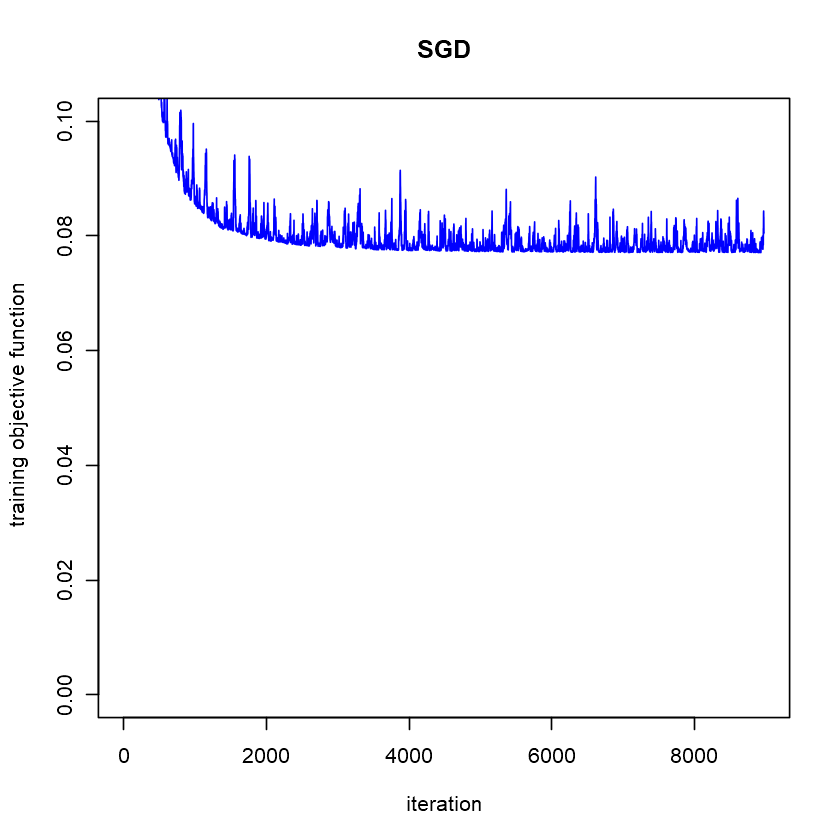

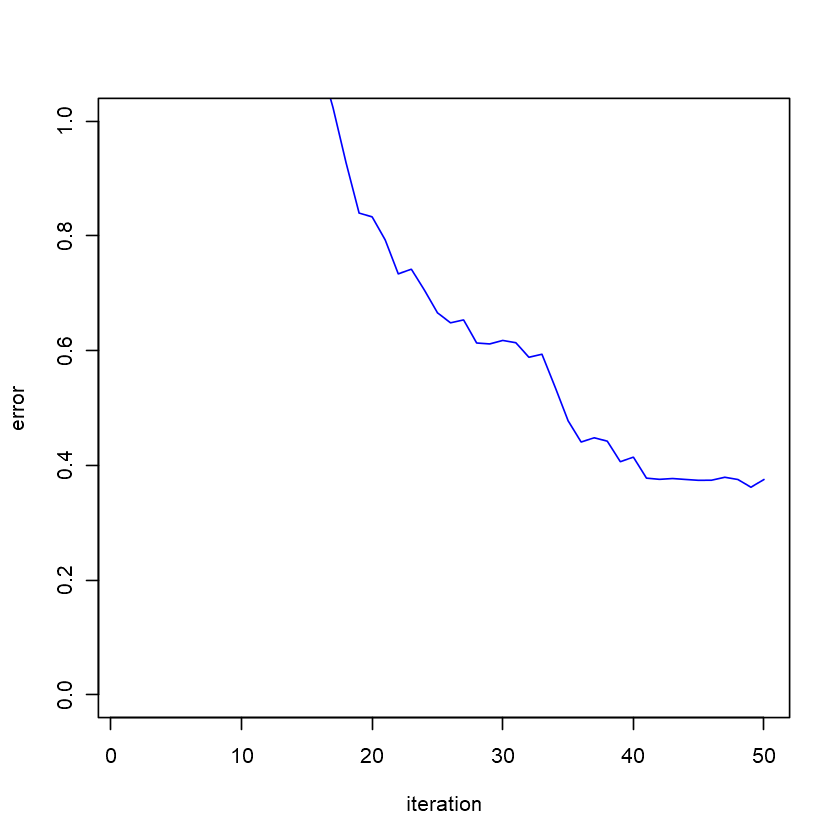

In [7]:
## Reading the data:

dtrain = read_data("Task1C_train.csv", TRUE)
dtest = read_data("Task1C_test.csv", TRUE)

## SGD Training:

max_epoch = 20
epsilon = .001
eta = .01
lambda=0

train_res = sgd_train(dtrain$x, dtrain$y, lambda, eta, epsilon, max_epoch)
errors = get_errors(dtrain, dtest, train_res$W, lambda) 

## Plotting the training objective function and errors vs iteration:

plot(train_res$val, main="SGD", type="l", col="blue", ylim=c(0,.1), xlab="iteration", ylab="training objective function")
plot(errors[1:50,1], type="l", col="blue",ylim=c(0,1), xlab="iteration", ylab="error")
lines(errors[1:50,2], type="l", lty=2, lwd=2, col="red")


In [8]:
head(dtrain)

,x1,x2,x3,x4
1,-1.726272,-0.7686694,-1.253692,-1.1134012
2,-1.718566,-0.8609384,-1.252529,-1.4567195
3,-1.710859,-0.8126050,-1.233924,-1.4247683
4,-1.703152,-0.7603718,-1.242529,-1.3533481
5,-1.695446,-0.7407895,-1.208574,-1.2311819
6,-1.687739,-0.6894690,-1.147409,-1.1948453
7,-1.680032,-0.7637738,-1.139036,-1.2054957
8,-1.672326,-0.7853060,-1.123687,-1.1716651
9,-1.664620,-0.7552273,-1.116477,-1.1378344
10,-1.656912,-0.8322703,-1.147874,-1.0676672


In [9]:
## Calculate the train and test missclassification rates for lamda values from 0 to 10 with steps of 0.4 and hence 
## the dataframe will have 26 rows:

sgd_testing <- function(){
miss <- data.frame('lambda'= c(0:25)/2.5, 'train'=rep(0,26), 'test'=rep(0,26))
l <-0
for (k in 1:26){
    max_epoch = 20
    epsilon = .001
    eta = .01
    lambda=l

    train_res = sgd_train(dtrain$x, dtrain$y, lambda, eta, epsilon, max_epoch)
    errors = get_errors(dtrain, dtest, train_res$W, lambda) 
    
    ## Calculating errors using RMSE:
    
    train_errors = errors[,1]*errors[,1]
    test_errors = errors[,-1]*errors[,-1]             
    
    miss[k,'lambda'] <- l
    miss[k,'train'] <- sqrt(mean(train_errors))
    miss[k,'test'] <- sqrt(mean(test_errors))
    l=l+0.4                                                                      ## Incrementing l to get next value
        
}
    
    ## Plot misclassification percentage for train and test data sets:
    
    miss.m <- melt(miss, id='lambda') # reshape for visualization
    names(miss.m) <- c('lambda', 'type', 'error')
    ggplot(data=miss.m, aes(x=log(lambda), y=error, color=type)) + geom_line(size=0.8) +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Lambda vs Error")
}

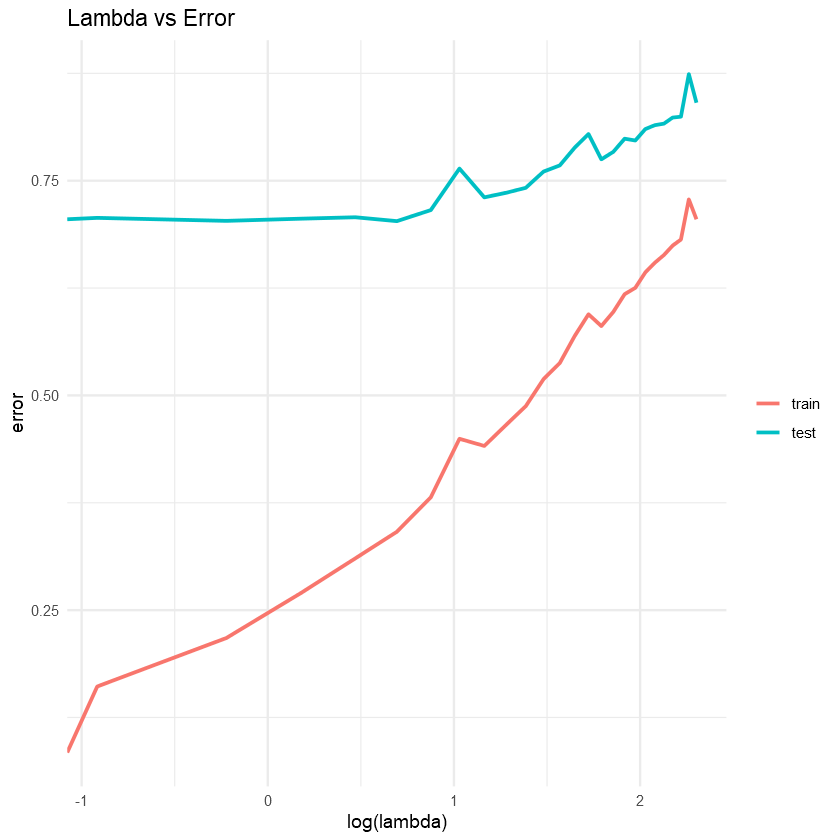

In [10]:
## Calling the function:

sgd_testing()


## Observations:

* Best Value for lambda - log(Lambda) value should be in the range of -0.9 to -0.5 as as the training error is less and the test error is low as well and after -0.5 the test error as well as the train error increases.

* Error rates - Below log(lambda) = -0.9 it is <b>overfitting</b> and after log(lambda)= -0.5 it is <b>underfitting</b>